#36120 Advanced Machine Learning Application - Spring 2023
##Assignment 1 (Week 3)
##Logistic Regesstion
##Run experiments by Sudarat Sukjaroen StudentID 24667255


Students are tasked to build a model to predict if a college basketball player will be drafted to join the NBA league based on his statistics for the current season.

The steps are:

1. Load and Explore Dataset
2. Data exploration
3. Data cleaning and Data preparation
  - Remove duplicate record
  - Replace Null value by Min, Max, Mean, Mode, Median
  - Mapping text to number
4. Calculate Information Gain (IG)
5. Calculate Principal Component Analysis (PCA)
6. Data Classification - Logistic Regression
*   Logistic Regression - Find the best hyperparameter set
*   Logistic Regression - Run the best hyperparameter set

# 1. Load and Explore Dataset

Import the pandas, numpy and altair packages

In [1]:
# Solution
import pandas as pd
import numpy as np
import altair as alt
from scipy import stats

Mounting the drive
In this notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read data from CSV file.

In [3]:
data = pd.read_csv('/content/drive/My Drive/AdvML/AT1/train.csv')
data_test = pd.read_csv('/content/drive/My Drive/AdvML/AT1/test.csv')

<ipython-input-3-6d528d1376ef>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/AdvML/AT1/train.csv')


# 2. Data exploration

*   Number of training data set = 56,091 (total 64 columns)
*   Number of test data set = 4,970 (total 63 columns)

Explore data information

In [ ]:
data.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55792 entries, 0 to 56090
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 55792 non-null  object 
 1   conf                 55792 non-null  object 
 2   GP                   55792 non-null  int64  
 3   Min_per              55792 non-null  float64
 4   Ortg                 55792 non-null  float64
 5   usg                  55792 non-null  float64
 6   eFG                  55792 non-null  float64
 7   TS_per               55792 non-null  float64
 8   ORB_per              55792 non-null  float64
 9   DRB_per              55792 non-null  float64
 10  AST_per              55792 non-null  float64
 11  TO_per               55792 non-null  float64
 12  FTM                  55792 non-null  int64  
 13  FTA                  55792 non-null  int64  
 14  FT_per               55792 non-null  float64
 15  twoPM                55792 non-null 

Explore data description.

In [ ]:
data.describe()
data_test.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,...,4970.000000,4969.000000,4969.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,15.865795,34.906881,89.500644,17.867626,43.657203,46.538342,5.168390,13.048753,10.356801,18.962254,...,16.569559,-2.149284,-0.526065,0.697025,1.953592,2.650609,1.069840,0.529118,0.260375,5.753262
std,8.276655,27.921356,35.338827,6.780159,20.716630,19.992005,7.030561,9.248595,9.427192,13.255566,...,10.550727,6.750792,3.920493,0.683636,1.533018,2.073589,1.153074,0.474838,0.380465,4.881835
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,-62.101300,-31.594500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,6.700000,80.900000,14.200000,38.400000,42.340000,1.400000,8.400000,4.300000,13.100000,...,6.891675,-4.443960,-1.868180,0.200000,0.750000,1.000000,0.250000,0.142900,0.000000,1.602175
50%,17.000000,32.350000,96.800000,18.000000,48.100000,50.850000,3.700000,12.300000,8.600000,18.100000,...,16.083350,-1.540360,-0.397400,0.500000,1.666700,2.260900,0.680000,0.428600,0.133300,4.535900
75%,22.000000,59.900000,107.100000,21.800000,54.000000,56.780000,7.400000,16.800000,14.500000,23.400000,...,25.991375,1.103500,1.049540,1.000000,2.882400,3.800000,1.533300,0.807700,0.333300,9.000000
max,33.000000,96.000000,391.200000,48.200000,150.000000,150.000000,231.800000,121.100000,100.000000,100.000000,...,38.800000,160.805000,71.811500,5.148100,10.681800,15.000000,8.400000,3.565200,3.640000,25.333300


Display data top 10 rows.

In [ ]:
data.head(10)
data_test.head(10)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360
5,Ball St.,MAC,20,63.0,108.6,26.5,54.3,58.88,9.1,12.6,...,2.787850,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,5247bd7c-a67b-427e-a8e8-79248e5060fe
6,Cal Poly,BW,8,9.5,74.5,18.4,52.6,53.86,5.2,20.0,...,-8.156100,-0.534680,0.5556,1.7778,2.3333,0.2222,0.0000,0.5556,3.3333,7dfdfb34-e3ab-4650-877c-8582f0674699
7,Hartford,AE,24,79.7,95.1,24.0,46.9,50.06,1.1,11.2,...,-1.056580,2.918550,0.2917,3.1667,3.4583,3.5417,2.5000,0.2500,11.6667,e7ebd32a-f567-4864-a319-384a7dce2719
8,Florida St.,ACC,9,1.8,72.7,25.2,28.6,28.57,7.0,0.0,...,-4.761570,-2.406140,0.1111,0.0000,0.1111,0.3333,0.1111,0.0000,0.4444,0f3f27ad-aa27-4f18-b32e-7bff491efbbf
9,Georgia Tech,ACC,2,0.2,200.0,13.7,100.0,100.00,0.0,0.0,...,9.582340,-1.018550,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,3de68227-0c33-40af-b7e8-beadbffe1fe2


In [ ]:
distinct_drafted_count = data['drafted'].nunique()
print('Number of distinct values in drafted:', distinct_drafted_count)

# Count the occurrences of each unique value in 'drafted' column
drafted_counts = data['drafted'].value_counts()

# Print the counts
for value, count in drafted_counts.items():
    print(f"{value} = {count}")

Number of distinct values in drafted: 2
0.0 = 55555
1.0 = 536


# 3. Data cleaning

##Drop duplicated records
Not found duplicated data

In [ ]:
# Check for duplicated values and display the count
duplicate_count = data.duplicated().sum()

# Print the number of duplicated values
print("Number of duplicated values in Train data set:", duplicate_count)

Number of duplicated values in Train data set: 0


In [ ]:
# Check for duplicated values and display the count
duplicate_count = data_test.duplicated().sum()

# Print the number of duplicated values
print("Number of duplicated values in Test data set:", duplicate_count)

Number of duplicated values in Test data set: 0


##Check Null value in columns

####Train data

In [ ]:
# Check for null values in all columns
null_columns = data.columns[data.isnull().any()]
null_count = data[null_columns].isnull().sum()

if null_count.empty:
    print("No null values found in any column.")
else:
    print("Columns with null values in Train data set:")
    print(null_count)

No null values found in any column.


####Test data

In [ ]:
# Check for null values in all columns
null_columns = data_test.columns[data_test.isnull().any()]
null_count = data_test[null_columns].isnull().sum()

if null_count.empty:
    print("No null values found in any column.")
else:
    print("Columns with null values in Test data set:")
    print(null_count)

No null values found in any column.


###Replace Null value to 0

In [49]:

data['ast_tov'].fillna(data['ast_tov'].median(), inplace=True)
#Accuracy: 0.9936714502183795
data['rimmade'].fillna(data['rimmade'].median(), inplace=True)
#Accuracy: 0.9939062640021508
data['pick'].fillna(data['pick'].max(), inplace=True)
#Accuracy: 0.9945335603548705
data['dunks_ratio'].fillna(data['dunks_ratio'].max(), inplace=True)
#Accuracy: 0.994712787884219
data['dunksmade'].fillna(data['dunksmade'].mean(), inplace=True)
#Accuracy: 0.9948920154135675

data_test['ast_tov'].fillna(data_test['ast_tov'].median(), inplace=True)
#Accuracy: 0.9936714502183795
data_test['rimmade'].fillna(data_test['rimmade'].median(), inplace=True)
#Accuracy: 0.9939062640021508
data_test['pick'].fillna(data_test['pick'].max(), inplace=True)
#Accuracy: 0.9945335603548705
data_test['dunks_ratio'].fillna(data_test['dunks_ratio'].max(), inplace=True)
#Accuracy: 0.994712787884219
data_test['dunksmade'].fillna(data_test['dunksmade'].mean(), inplace=True)
#Accuracy: 0.9948920154135675
##################################################################


data = data.fillna(0)
data_test = data_test.fillna(0)



<ipython-input-49-44ce60ae8ec3>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/AdvML/AT1/train.csv')


# 3.1 Data preparation

##Mapping columns from text to number

###Mapping team to team_number

In [50]:
# Select distinct values from a column
distinct_values = data['team'].unique()

# Count distinct values in the 'team' column for the 'data' DataFrame
distinct_count_data = data['team'].nunique()
print("Train data set: Distinct count in team:", distinct_count_data)
print(distinct_values)

Train data set: Distinct count in team: 358
['South Alabama' 'Utah St.' 'South Florida' 'Pepperdine' 'Pacific'
 'Butler' 'Longwood' 'Fordham' 'Wagner' 'Pittsburgh' 'Connecticut'
 'North Carolina St.' 'Chicago St.' 'LSU' 'Boston University' 'Detroit'
 'Albany' 'Manhattan' 'Navy' "Saint Mary's" 'Alabama A&M' 'Hofstra'
 'James Madison' 'Missouri St.' 'Alabama' 'Boston College' 'Drexel'
 'Binghamton' 'Bowling Green' 'Maryland' 'Colorado' 'Southern Miss'
 'Old Dominion' 'Cal St. Fullerton' 'Oregon St.' 'St. Francis PA'
 'Southern Illinois' 'Loyola Chicago' 'Indiana' 'Hawaii' 'Elon'
 'Holy Cross' 'Vanderbilt' 'VCU' 'Monmouth' 'North Carolina A&T' 'Lamar'
 'Howard' 'Furman' 'George Mason' 'Louisiana Lafayette' 'Marquette'
 'Central Connecticut' 'Providence' 'Princeton' 'Virginia' 'Georgia St.'
 'UAB' 'Florida St.' 'Duke' 'Purdue' 'New Orleans' 'Notre Dame' 'Wofford'
 'California' 'Arizona' 'UTEP' 'Centenary' 'Appalachian St.' 'Brown'
 'Illinois Chicago' 'Bucknell' 'Long Beach St.' 'Richmond' 

In [51]:
# Select distinct values from a column
distinct_values = data_test['team'].unique()

# Count distinct values in the 'team' column for the 'data' DataFrame
distinct_count_data = data_test['team'].nunique()
print("Test data set: Distinct count in team:", distinct_count_data)
print(distinct_values)

Test data set: Distinct count in team: 347
['Morgan St.' 'South Carolina St.' 'Binghamton' 'Illinois' 'Iowa St.'
 'Ball St.' 'Cal Poly' 'Hartford' 'Florida St.' 'Georgia Tech' 'Weber St.'
 'Cincinnati' 'Dayton' 'Colorado' 'Minnesota' 'Michigan' 'Drexel'
 'Texas St.' 'Southern Utah' 'Florida Atlantic' 'Duquesne'
 'Loyola Marymount' 'Wisconsin' 'DePaul' 'Vermont' 'North Carolina A&T'
 'Southeastern Louisiana' 'Seton Hall' 'UC Riverside' 'Bryant'
 'Michigan St.' 'Indiana St.' 'Texas A&M' 'Butler' 'Long Beach St.'
 'Kentucky' 'Virginia' 'Richmond' 'Baylor' 'SMU' 'George Mason' 'Oregon'
 'Kent St.' 'Old Dominion' 'VCU' 'Hofstra' 'Detroit' 'Denver' 'Louisville'
 'Missouri' 'Bowling Green' 'Southern Illinois' 'Cal St. Bakersfield'
 'Western Michigan' 'IUPUI' 'Valparaiso' 'College of Charleston'
 'Mississippi St.' 'Idaho' 'Texas A&M Corpus Chris' 'Santa Clara'
 'Middle Tennessee' 'Wake Forest' 'Houston Baptist' 'North Carolina'
 'Southeast Missouri St.' 'Abilene Christian' 'Furman' 'La Salle'


In [52]:
data['team_number'] = pd.factorize(data['team'])[0]
# Select distinct values from a column
distinct_values = data['team_number'].unique()

data_test['team_number'] = pd.factorize(data_test['team'])[0]
# Select distinct values from a column
distinct_values = data_test['team_number'].unique()

# Print the distinct values
print(distinct_values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

###Mapping conf to conf_number

In [53]:
# Select distinct values from a column
distinct_values = data['conf'].unique()
# Print the distinct values
print(distinct_values)

# Select distinct values from a column
distinct_values = data_test['conf'].unique()
# Print the distinct values
print(distinct_values)

['SB' 'WAC' 'BE' 'WCC' 'BW' 'Horz' 'ind' 'A10' 'NEC' 'ACC' 'SEC' 'AE'
 'MAAC' 'Pat' 'SWAC' 'CAA' 'MVC' 'MAC' 'B12' 'CUSA' 'P10' 'B10' 'SC'
 'MEAC' 'Slnd' 'Ivy' 'Sum' 'ASun' 'MWC' 'BSky' 'OVC' 'BSth' 'GWC' 'P12'
 'Amer' 'Ind']
['MEAC' 'AE' 'B10' 'B12' 'MAC' 'BW' 'ACC' 'BSky' 'Amer' 'A10' 'P12' 'CAA'
 'SB' 'CUSA' 'WCC' 'BE' 'Slnd' 'NEC' 'MVC' 'SEC' 'Horz' 'Sum' 'OVC' 'SC'
 'MAAC' 'SWAC' 'ASun' 'MWC' 'WAC' 'BSth' 'Pat']


In [54]:
data['conf_number'] = pd.factorize(data['conf'])[0]
# Select distinct values from a column
distinct_values = data['conf_number'].unique()

data_test['conf_number'] = pd.factorize(data_test['conf'])[0]
# Select distinct values from a column
distinct_values = data_test['conf_number'].unique()

# Print the distinct values
print(distinct_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


###Mapping yr to yr_number

In [55]:
#Accuracy: 0.9937270364728022

# Select distinct values from a column
distinct_values = data['yr'].unique()
# Print the distinct values
print(distinct_values)

# Select distinct values from a column
distinct_values = data_test['yr'].unique()
# Print the distinct values
print(distinct_values)

['So' 'Sr' 'Jr' 'Fr' '0' 0 '57.1' '42.9' 'None']
['Sr' 'Jr' 'So' 'Fr' 'None']


In [56]:
#Student’s year of study: `Fr` for freshmen, `So` for sophomores, `Jr` for juniors, `Sr` for seniors
valid_years = ['Fr', 'So', 'Jr', 'Sr']

data = data[data['yr'].isin(valid_years)]
data['yr_number'] = pd.factorize(data['yr'])[0]
# Select distinct values from a column
distinct_values = data['yr_number'].unique()

#data_test = data_test[data_test['yr'].isin(valid_years)]
data_test['yr_number'] = pd.factorize(data_test['yr'])[0]
# Select distinct values from a column
distinct_values = data_test['yr_number'].unique()

# Print the distinct values
print(distinct_values)

[0 1 2 3 4]


<ipython-input-56-f9b24e522649>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yr_number'] = pd.factorize(data['yr'])[0]


###Mapping ht to ht_number

In [57]:
# Select distinct values from a column
distinct_values = data['ht'].unique()
# Print the distinct values
print(distinct_values)

# Select distinct values from a column
distinct_values = data_test['ht'].unique()
# Print the distinct values
print(distinct_values)

['2-Jun' '4-Jun' '8-Jun' '1-Jun' '5-Jun' 'Jun-00' '6-Jun' '9-Jun' '3-Jun'
 '11-Jun' '7-Jun' '10-May' '10-Jun' '11-May' '9-May' 'Jul-00' '7-May'
 '5-Jul' '8-May' '6-May' '2-Jul' '1-Jul' '-' '3-May' '3-Jul' 'Apr-00'
 '5-May' '4-Jul' "6'4" '4-May' '0' '1-May' '6-Jul' '5-Apr' '2-May' 0]
['4-Jun' 'Jun-00' '9-Jun' '2-Jun' '3-Jun' '10-Jun' '1-Jun' '6-Jun' '5-Jun'
 '11-Jun' '7-Jun' '8-Jun' '11-May' '8-May' '1-Jul' 'Jul-00' '10-May'
 '3-Jul' '9-May' '2-Jul' '2-May' '7-May' '6-May' '4-Jul' 0 'None']


In [58]:
data['ht_number'] = pd.factorize(data['ht'])[0]
# Select distinct values from a column
distinct_values = data['ht_number'].unique()
# Print the distinct values
print(distinct_values)

data_test['ht_number'] = pd.factorize(data_test['ht'])[0]
# Select distinct values from a column
distinct_values = data_test['ht_number'].unique()
# Print the distinct values
print(distinct_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


###Mapping num to num_number

In [59]:
# Select distinct values from a column
distinct_values = data['num'].unique()
# Print the distinct values
print(distinct_values)

# Select distinct values from a column
distinct_values = data_test['num'].unique()
# Print the distinct values
print(distinct_values)

[0 '53' '5' '14' '22' '20' '34' '24' '54' '15' '13' '10' '21' '32' '12'
 '51' '31' '33' '1' '45' '50' '3' '23' '2' '4' '55' '35' '42' '25' '41'
 '52' '11' '40' '30' '43' '0' '44' '23B' 'None' '26' '99' '4A' '31/24'
 '--' 10.0 22.0 3.0 23.0 30.0 13.0 15.0 1.0 5.0 35.0 2.0 32.0 11.0 40.0
 33.0 4.0 12.0 20.0 50.0 25.0 44.0 21.0 31.0 14.0 34.0 24.0 55.0 45.0 52.0
 51.0 41.0 54.0 42.0 43.0 53.0]
['25.0' '0.0' '32.0' '5.0' '1.0' '30.0' '33.0' '45.0' '12.0' '41.0' '24.0'
 '51.0' '22.0' '15.0' '20.0' '10.0' '2.0' '11.0' '3.0' '4.0' '14.0' '35.0'
 '52.0' '13.0' '21.0' '23.0' '44.0' '50.0' '31.0' '34.0' '55.0' 0 '42.0'
 '54.0' '40.0' '23' '14' '0' '1' '2' '32' '22' '4' '25' '10' '5' '11' '12'
 '15' '3' '44' '13' '30' '20' '50' '55' '35' '33' '24' '21' '42' '41' '45'
 '34' '43' '52' '53' '40' '31' '54' '51' 'None']


In [60]:
data['num_number'] = pd.factorize(data['num'])[0]
# Select distinct values from a column
distinct_values = data['num_number'].unique()

data_test['num_number'] = pd.factorize(data_test['num'])[0]
# Select distinct values from a column
distinct_values = data_test['num_number'].unique()

# Print the distinct values
print(distinct_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]


###Mapping player_id to player_number

In [61]:
# Select distinct values from a column
distinct_values = data['player_id'].unique()

# Count distinct values in the 'layer_id' column for the 'data' DataFrame
distinct_count_data = data['player_id'].nunique()
print("Train data set: Distinct count in player_id:", distinct_count_data)
print(distinct_values)

# Select distinct values from a column
distinct_values = data_test['player_id'].unique()

# Count distinct values in the 'player_id' column for the 'data' DataFrame
distinct_count_data = data_test['player_id'].nunique()
print("Test data set: Distinct count in player_id:", distinct_count_data)
print(distinct_values)

Train data set: Distinct count in player_id: 23740
['7be2aead-da4e-4d13-a74b-4c1e692e2368'
 '61de55d9-1582-4ea4-b593-44f6aa6524a6'
 'efdc4cfc-9dd0-4bf8-acef-7273e4d5b655' ...
 'e95d08eb-1273-4094-9173-c47368222c0d'
 '2f315a7b-2e82-44a2-8597-1779102ace09'
 '65571c18-b2b4-4ba6-84db-7357a76e6f59']
Test data set: Distinct count in player_id: 4970
['cf302b4d-84f7-4124-a25d-a75eed31978b'
 'f91837cd-4f49-4b70-963d-aeb82c6ce3da'
 '53ec2a29-1e7d-4c6d-86d7-d60d02af8916' ...
 'f8df22c4-1602-4fab-896d-8820951aae2f'
 'b791c69a-f769-4163-afda-051a6fd20a9d'
 '18b51f5d-4746-4121-88fd-c8d0a1399130']


In [62]:
data['player_number'] = pd.factorize(data['player_id'])[0]
# Select distinct values from a column
distinct_values = data['player_number'].unique()

data_test['player_number'] = pd.factorize(data_test['player_id'])[0]
# Select distinct values from a column
distinct_values = data_test['player_number'].unique()

# Print the distinct values
print(distinct_values)

[   0    1    2 ... 4967 4968 4969]


#4. Calculate Information Gain (IG)
To know which feature is the important factor to identify, drafted = 1.



In [341]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif


# Split the data into features and target variable
X = data.drop(['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id','drafted'], axis=1)
y = data['drafted']

# Calculate information gain of each feature
info_gain = mutual_info_classif(X, y)


# Create a DataFrame with feature names and information gain
ig_df = pd.DataFrame({"feature": X.columns, "ig": info_gain})

# Sort the DataFrame by information gain in descending order
ig_df = ig_df.sort_values(by="ig", ascending=False)

# Create a dictionary to store the information gain of each feature
info_gain_dict = {}
for i in range(len(X.columns)):
    info_gain_dict[X.columns[i]] = info_gain[i]

# Sort the dictionary by value in reverse order and print the items
for feature, ig in sorted(info_gain_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {ig}")


# Sort the dictionary by information gain score in descending order
sorted_info_gain = sorted(info_gain_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top x features with highest information gain
top_x_features = [sorted_info_gain[i][0] for i in range(35)]
print("Top x features with highest information gain:", top_x_features)

pick: 0.04722748455883041
dporpag: 0.023173642452797516
porpag: 0.02209395328046071
gbpm: 0.02137641882506547
bpm: 0.01929367189522757
stops: 0.01891403267233205
adjoe: 0.0184724792088804
ogbpm: 0.018440033010773127
twoPM: 0.016792989206058317
pts: 0.01670403583680946
Rec_Rank: 0.01662807488197704
twoPA: 0.015778410837486545
obpm: 0.015260257811865019
FTM: 0.014656784261478095
FTA: 0.014370988515003735
dunks_ratio: 0.013852806354480718
dreb: 0.012937705257783372
mp: 0.012127675400695481
dunksmade: 0.01182167696821046
rimmade: 0.011534967116884065
treb: 0.011521847042461397
adrtg: 0.011460759664863707
GP: 0.011027279305584448
midmade: 0.011003207219471345
midmade_midmiss: 0.011002796593698294
dunksmiss_dunksmade: 0.01015472622238478
Min_per: 0.009658029716876126
rimmade_rimmiss: 0.00953723686484953
blk: 0.009444264257837398
stl: 0.009172668597190348
dgbpm: 0.008860093193322816
Ortg: 0.0085751910502474
oreb: 0.008256743379519982
dbpm: 0.0076938822180041555
usg: 0.007410819396521662
ast: 

#5. Calculate Principal Component Analysis (PCA)
Calculate PCA 80%, 90%, and 100%, but the number of components for 80% and 90% is almost the same as 100%. Then I decide to use 100% to experiment.

*   80% = n_components = np.where(cumulative_var_ratio >= 0.2)[0][0] + 1
*   90% = n_components = np.where(cumulative_var_ratio >= 0.1)[0][0] + 1
*   100% = n_components = np.where(cumulative_var_ratio >= 1.0)[0][0] + 1

Number of classes =  2
[5.76882237e-01 1.33148124e-01 5.93057878e-02 4.79607827e-02
 3.85014499e-02 3.49355639e-02 2.30192006e-02 1.96848418e-02
 1.72315441e-02 1.45262370e-02 9.26094857e-03 7.56194962e-03
 6.74707268e-03 4.26382666e-03 2.80995537e-03 1.48926918e-03
 1.06557712e-03 7.14904552e-04 4.99959892e-04 3.90767685e-04]


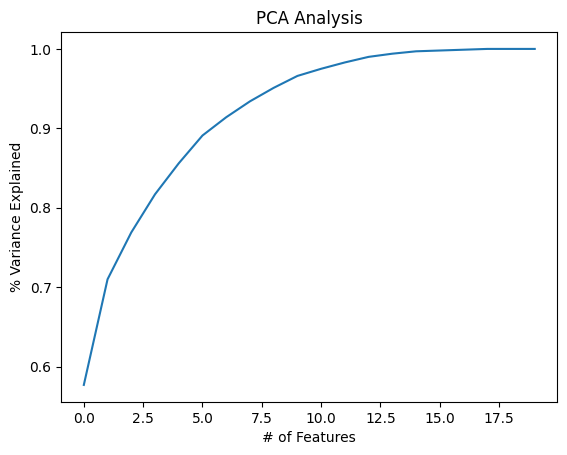

[0.577 0.71  0.769 0.817 0.856 0.891 0.914 0.934 0.951 0.966 0.975 0.983
 0.99  0.994 0.997 0.998 0.999 1.    1.    1.   ]
Number of Components (>Z%) =  6
Data Shape =  (54925, 70)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Split the data into features and target variable
#X = top_x_features
X_top_x = X[top_x_features]
y = data['drafted']


# Let's grab the data we'll need
n_classes = len(np.unique(data['drafted'])) # classes
print("Number of classes = ",n_classes)
labels = data['drafted']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top_x)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)


# Calculate the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))

# Find the number of principal components that explain at least 80% of the total variance
n_components = 6#np.where(cumulative_var_ratio >= 0.2)[0][0] + 1

# Select the first n_components principal components from the transformed data
X_pca_selected = X_pca[:, :n_components]

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(cumulative_var_ratio)
plt.show()

#Cumulative variance
print(cumulative_var_ratio)
print('Number of Components (>Z%) = ', n_components)
print('Data Shape = ', data.shape)

#6. Data Classification - Logistic regression

##Logistic regression - Find the best hyperparameter set


###Original

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9948920154135675
Precision: 0.7922077922077922
Recall: 0.5980392156862745
F1 Score: 0.6815642458100559
Confusion Matrix:
 [[11041    16]
 [   41    61]]
Data Shape =  (55792, 70)


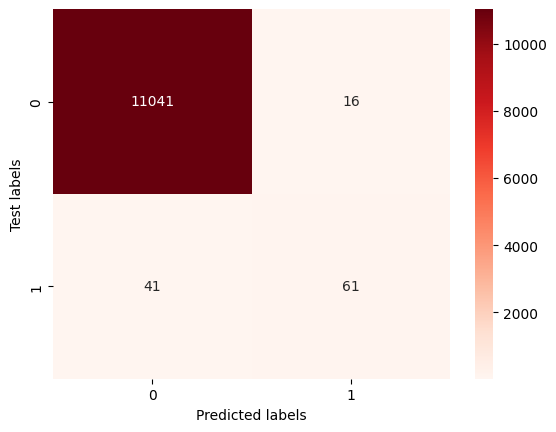

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets

X = data.drop(['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id','drafted'], axis=1)
y = data['drafted']

#X = X[top_x_features]
#X_train, X_test, y_train, y_test = train_test_split(X_top_x, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier object
clf = LogisticRegression(max_iter=100)

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Initialize a new logistic regression classifier with the best hyperparameters
best_clf = LogisticRegression(**best_params, max_iter=1000)

# Train the classifier on the training data
best_clf.fit(X_train, y_train)

# Test the classifier on the testing data
y_pred = best_clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)
print('Data Shape = ', data.shape)

# create heatmap visualization
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Test labels')
plt.show()

##Logistic Regression - Run the best hyperparameter set


In [433]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Get the feature names (column names) of the first DataFrame
feature_names_data = data.columns

# Reindex the second DataFrame to match the order of feature names in the first DataFrame
data_test_reindexed = data_test.reindex(columns=feature_names_data)

# Create a logistic regression classifier object with specified best hyperparameters
best_clf = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)

# Train the classifier on the original training data
X = data.drop(['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id','drafted'], axis=1)
y = data['drafted']
best_clf.fit(X, y)

# Load the test dataset
player_ids = data_test_reindexed['player_id']
X_new_test = data_test_reindexed.drop(['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id', 'drafted'], axis=1)
X_new_test.shape

# Get predictions for the new test data
y_pred_new = best_clf.predict(X_new_test)
probs = best_clf.predict_proba(X_new_test)[:, 1]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Player_ID': player_ids,
    'Predicted_Labels': y_pred_new,
    'Probs' : probs
})

# Load the data
output_file = '/content/drive/My Drive/AdvML/AT1/submission.csv'

# Save the result to an output file
results_df['player_id'] = player_ids
results_df['drafted'] = y_pred_new
results_df['prob'] = probs
results_df.to_csv(output_file, index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
